## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Exploratory analysis - Initial Ploting and Data Parsing.

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import xarray as xr
import seaborn as sns # for density plots
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# from datetime import datetime
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (14,5) # For Increasing Size of graph

In [50]:
# Dataframe for IMAGER data
rainfall_df = pd.read_csv("data/imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
precip_dataset = xr.open_dataset('data/chirps-2010.nc') # open the dataset using xarray
# # Gauge Station Data
jan_gauge_df = pd.read_csv('data/daily_jan_2010.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])
june_gauge_df = pd.read_csv('data/daily_jun_2010.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])
july_gauge_df = pd.read_csv('data/daily_jul_2010.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])
aug_gauge_df = pd.read_csv('data/daily_aug_2010.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])
sept_gauge_df = pd.read_csv('data/daily_sept_2010.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])

### Parsing the Gauge Station Data for JANUARY 2010

In [51]:
jan_gauge_df['date']=pd.to_datetime(jan_gauge_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
june_gauge_df['date']=pd.to_datetime(june_gauge_df['day'], unit='D', origin=pd.Timestamp('2010-05-31'))
july_gauge_df['date']=pd.to_datetime(july_gauge_df['day'], unit='D', origin=pd.Timestamp('2010-06-30'))
aug_gauge_df['date']=pd.to_datetime(aug_gauge_df['day'], unit='D', origin=pd.Timestamp('2010-07-31'))
sept_gauge_df['date']=pd.to_datetime(sept_gauge_df['day'], unit='D', origin=pd.Timestamp('2010-08-31'))

### Parsing the CHIRPS dataset for JANUARY 2010

In [17]:
# Dataframe for CHIRPS Dataset
precip_df = precip_dataset['precip'].sel(time=slice('2010-01-01T00:0','2010-01-31T00:0'), longitude=103.67499, latitude=1.324997).to_dataframe()

### Parsing the IMAGER dataset

In [18]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

In [19]:
sampled_df = pd.DataFrame()
sampled_df = rainfall_df.groupby(pd.Grouper(freq="M")).resample('D').sum() # Groupby MONTH and then taking the total daily sum
sampled_df.drop(['day', 'hour', 'minute'], axis=1, inplace=True) # Dropped the day, hour, minute columns
sampled_df = sampled_df.reset_index(level=0, drop=True)
# display(sampled_df)

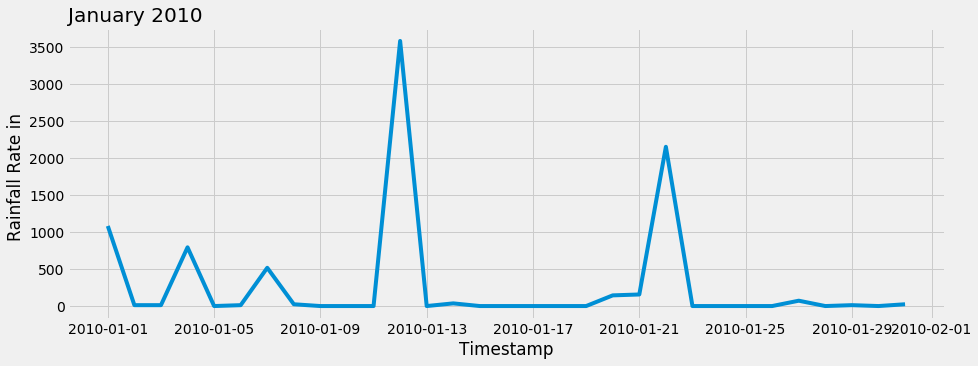

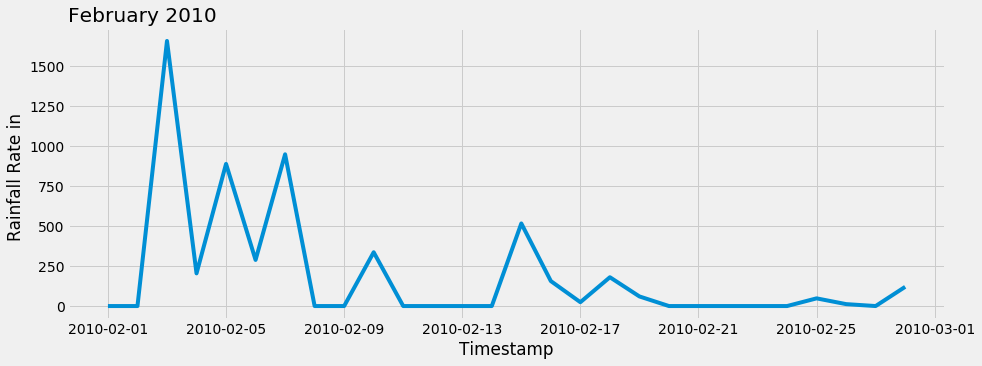

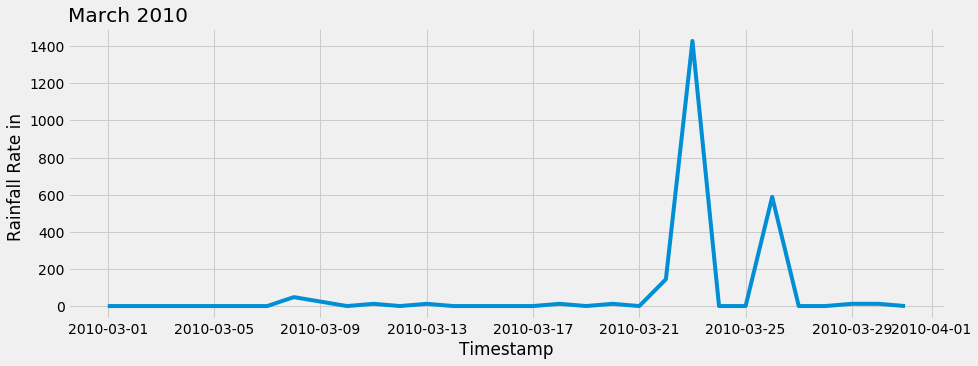

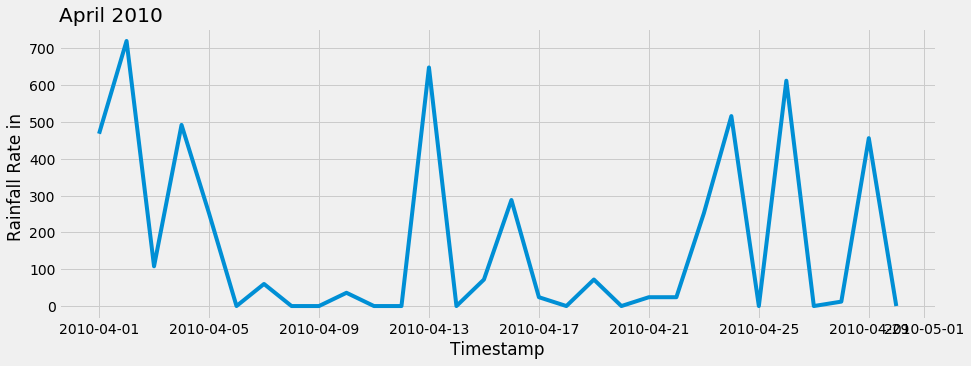

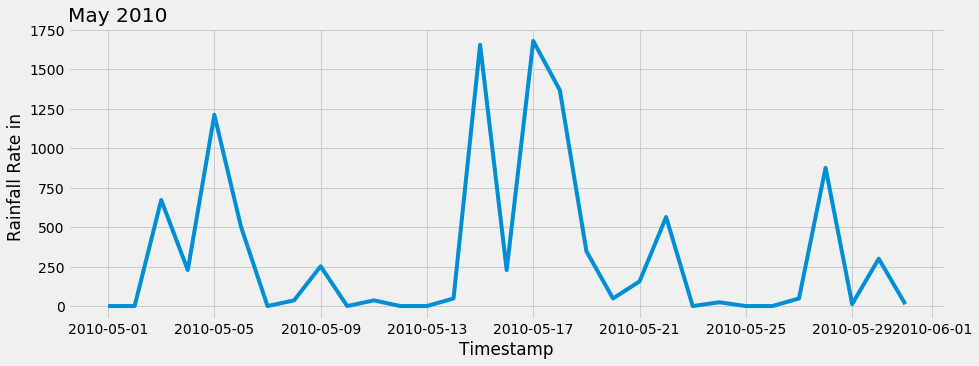

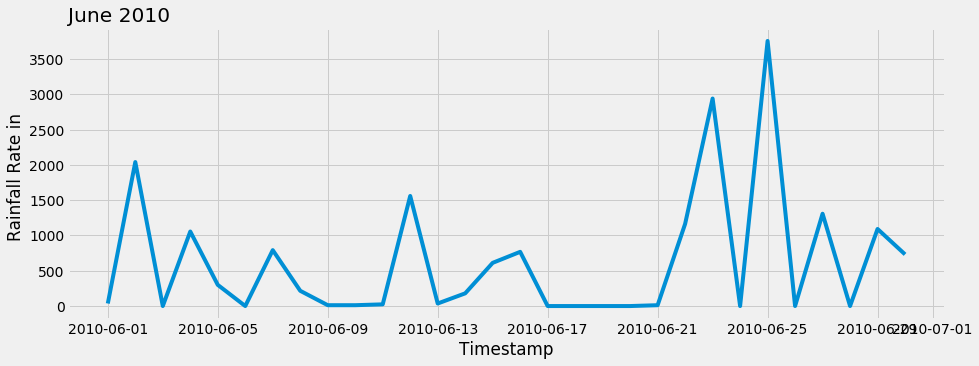

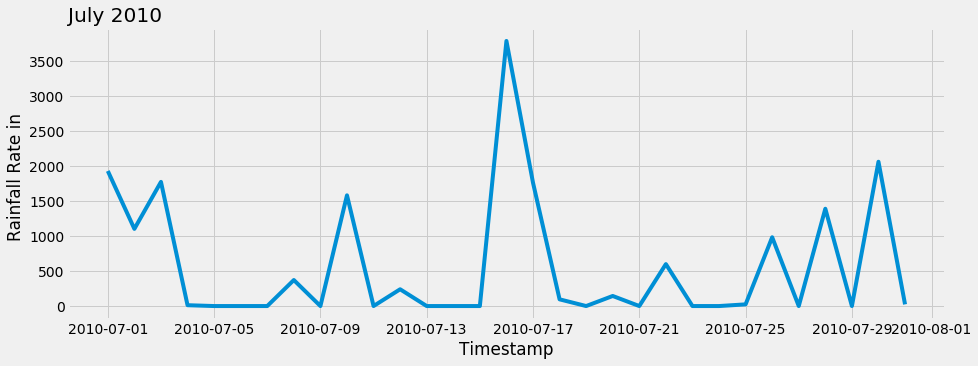

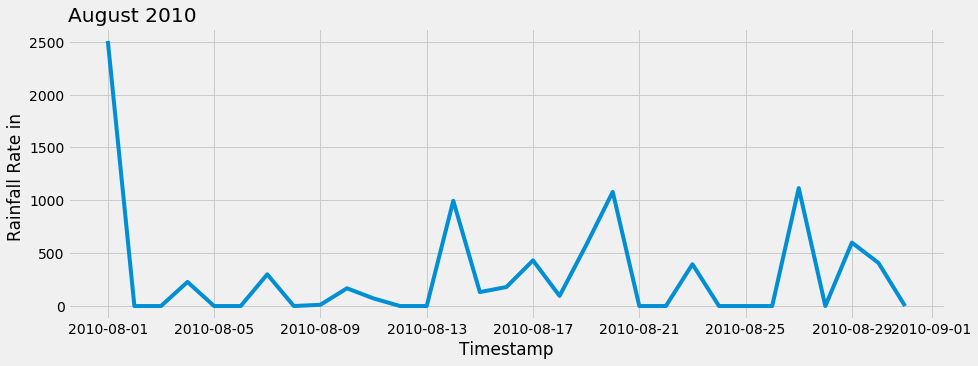

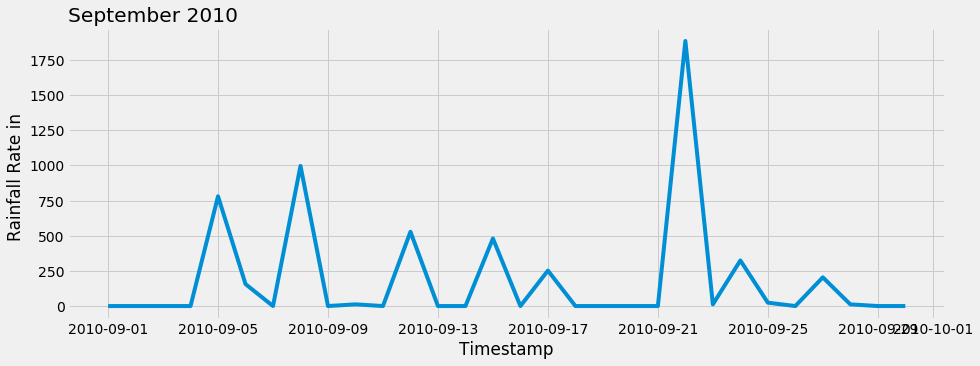

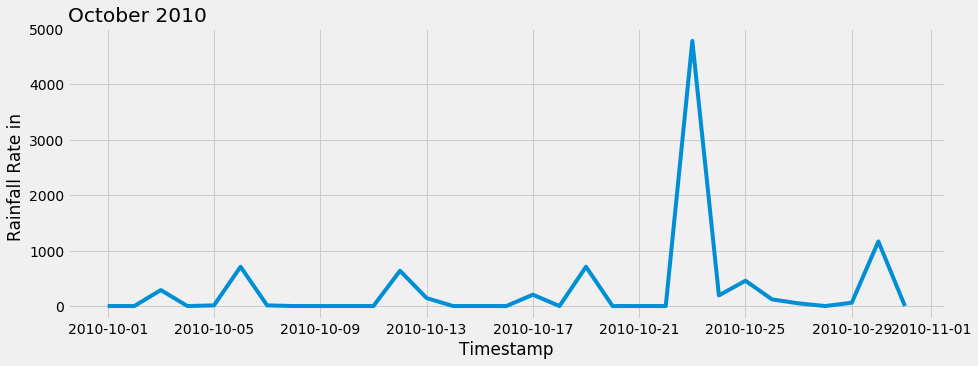

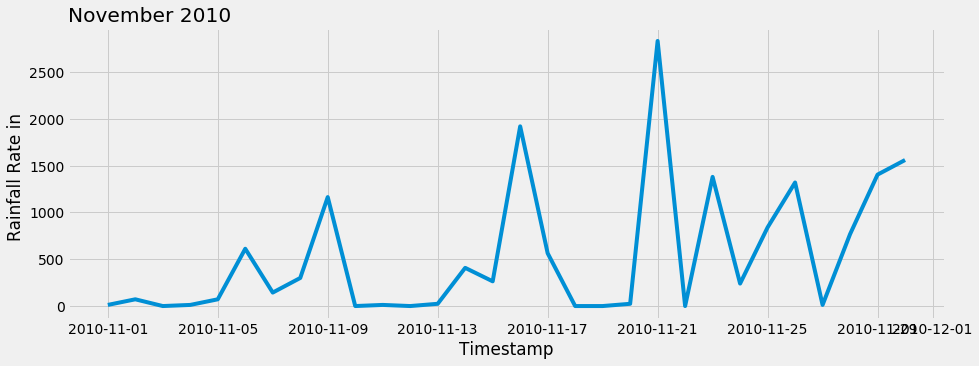

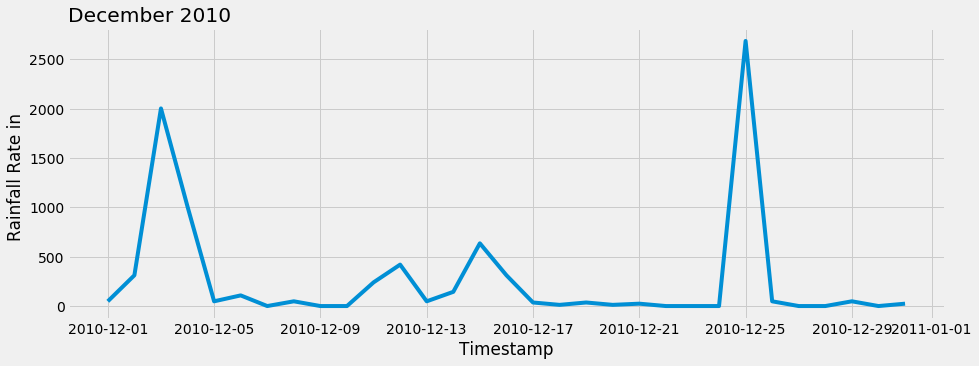

In [20]:
def plot_monthly_data():
    titles = ["January 2010", "February 2010", "March 2010", "April 2010", "May 2010", "June 2010", "July 2010", "August 2010", "September 2010", "October 2010", "November 2010", "December 2010"]
    for i in range(1, 13):
        plt.figure()
        plt.plot(sampled_df[sampled_df.index.month == i]['rainfall_rate'])
        plt.title(titles[i-1], loc='left')
        plt.xlabel('Timestamp')
        plt.ylabel('Rainfall Rate in ')
        # Show/save figure as desired.
        plt.show()
plot_monthly_data()

### Basic data analysis for the IMAGER data

In [21]:
daily_statistics_df = pd.DataFrame()
monthly_statistics_df = pd.DataFrame()
daily_statistics_df['daily_total_rate'] = rainfall_df.rainfall_rate.resample('D').sum()
daily_statistics_df['daily_mean_rate'] = rainfall_df.rainfall_rate.resample('D').mean()
monthly_statistics_df['monthly_total_rate'] = rainfall_df.rainfall_rate.resample('M').sum()
monthly_statistics_df['monthly_mean_rate'] = rainfall_df.rainfall_rate.resample('M').mean()

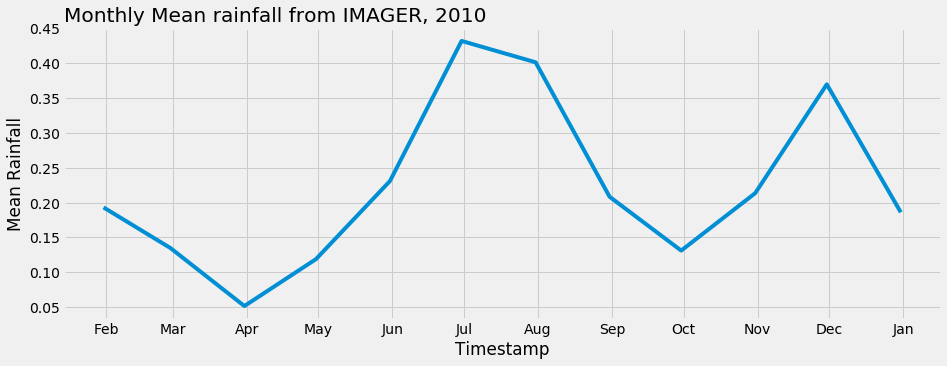

In [22]:
plt.plot(monthly_statistics_df['monthly_mean_rate'], )
plt.title("Monthly Mean rainfall from IMAGER, 2010", loc='left')
plt.xlabel('Timestamp')
plt.ylabel('Mean Rainfall')
ax = plt.gca()
locator = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(month_fmt)

## January Rainfall Comparison with Gauge Station Data
Taken from - www.weather.gov.sg/climate-historical-daily/

NOTE : The Imager Raifall Column in divided by 100, in order to fit it with Gauge Station Data. After knowing the actual units of the data it would be corrected.

Text(0, 0.5, 'Rainfall Rate')

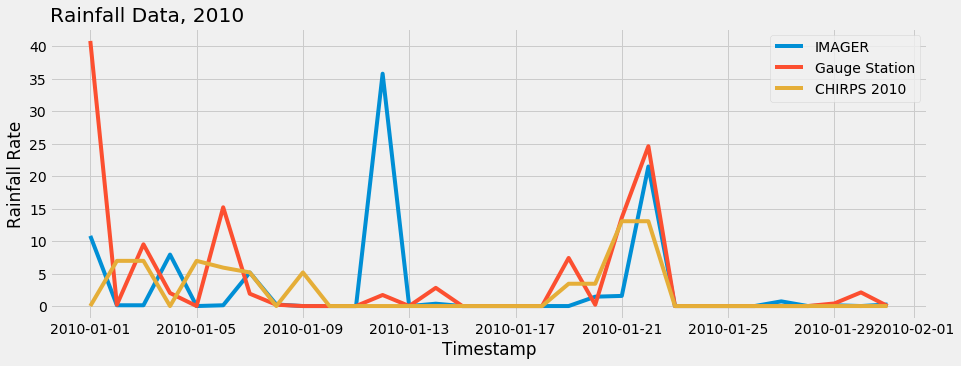

In [54]:
plt.plot(sampled_df[sampled_df.index.month == 1]['rainfall_rate']/100, label='IMAGER')
plt.plot(jan_gauge_df['date'], jan_gauge_df['rainfall'], label='Gauge Station')
plt.plot(precip_df['precip'], label='CHIRPS 2010')
plt.title('Rainfall Data, 2010', loc='left')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Rainfall Rate')

In [71]:
pearson_coeff = (sampled_df[sampled_df.index.month == 1]['rainfall_rate']).corr(jan_gauge_df['rainfall'])
pearson_coeff

nan

/Users/dhirajsaharia/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


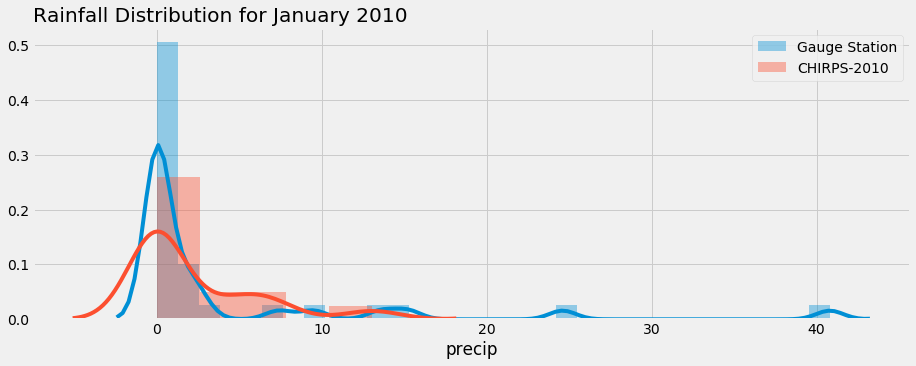

In [69]:
sns.distplot(jan_gauge_df['rainfall'], hist=True, kde=True, label='Gauge Station')
sns.distplot(precip_df['precip'], hist=True, kde=True, label='CHIRPS-2010')
# sns.distplot(sampled_df[sampled_df.index.month == 1]['rainfall_rate'], label='IMAGER')
plt.title('Rainfall Distribution for January 2010', loc='left')
plt.legend()

## Monsoon Season Analysis -
According to [this](https://www.guidemesingapore.com/business-guides/immigration/get-to-know-singapore/weather-and-climate-in-singapore),
There is no clear-cut wet or dry season and rain is experienced every single month, usually in the afternoons and early evenings. However, there are two main monsoon seasons in Singapore: **Northeast Monsoon Season (December-March) and the Southwest Monsoon Season (June-September)**.

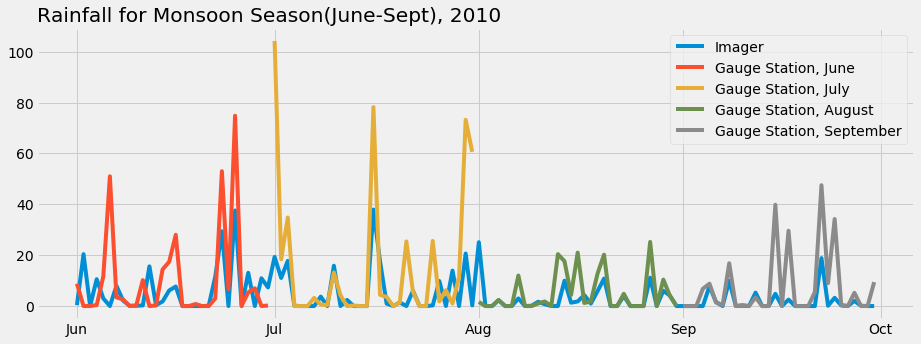

In [68]:
plt.plot(sampled_df[(sampled_df.index.month >= 6) & (sampled_df.index.month <= 9)]['rainfall_rate']/100, label='Imager')
plt.plot(june_gauge_df['date'], june_gauge_df['rainfall'], label='Gauge Station, June')
plt.plot(july_gauge_df['date'], july_gauge_df['rainfall'], label='Gauge Station, July')
plt.plot(aug_gauge_df['date'], aug_gauge_df['rainfall'], label='Gauge Station, August')
plt.plot(sept_gauge_df['date'], sept_gauge_df['rainfall'], label='Gauge Station, September')
plt.title('Rainfall for Monsoon Season(June-Sept), 2010', loc='left')
ax = plt.gca()
locator = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(month_fmt)
plt.legend();

The points are more or less aligned, therefore the IMAGER is giving good aproximates for larger amount of rainfall. It will be more coherant when the units of IMAGER is known.